#Normalisation - it is the technique to remove the units and keep the magnitude only on a common scale - most problems are usually solved by scaling however minmax when you already know the numerical quantity is going to bounded between two set values, use robust scaling when too many outliers, use maxabscaling when sparse dataset with too many zeros

use everything as beginner

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [3]:
df.head()


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='Alcohol', ylabel='Density'>

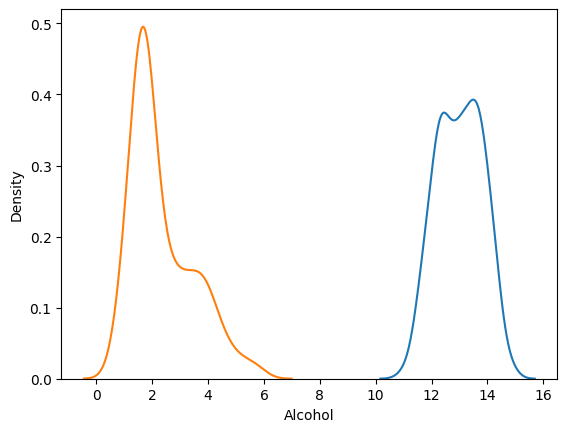

In [4]:
#class label is dependent and alcohol and malic acid is independent
sns.kdeplot(df['Alcohol'])
sns.kdeplot(df['Malic acid'])

C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

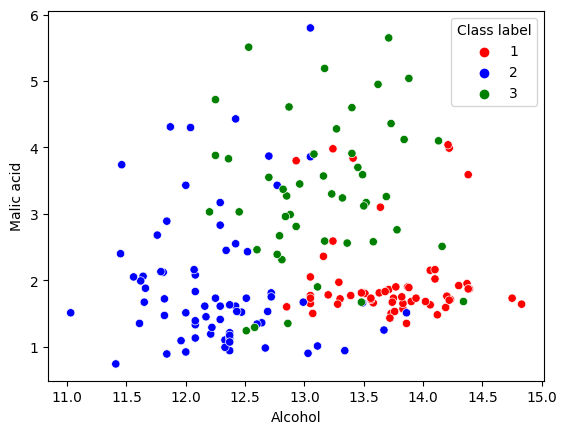

In [5]:
#scatterplot
sns.scatterplot(data =df,x = 'Alcohol', y = 'Malic acid', hue = 'Class label', palette = ['Red','Blue', 'Green'])

In [6]:
#minmax normalisation - (xi-xmin)/(xmax-xmean) - 0 to 1
#first split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [7]:
#min max 
from sklearn.preprocessing import MinMaxScaler

mnscaler = MinMaxScaler()
mnscaler.fit(X_train)

MinMaxScaler()

In [8]:
X_train_scaled = mnscaler.transform(X_train)
X_test_scaled = mnscaler.transform(X_test)


In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()
#min and max are now from 0 to 1

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.508765,0.308143
std,0.221444,0.224504
min,0.000000,0.000000
25%,0.331579,0.152749
50%,0.503947,0.205703
75%,0.701316,0.464358
max,1.000000,1.000000


In [10]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'After Scaling')

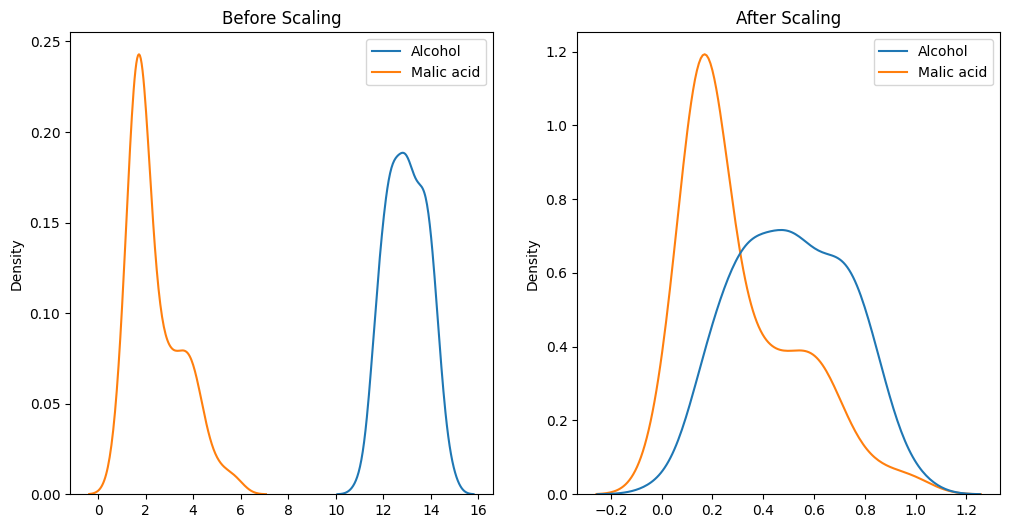

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(X_train, ax=axes[0])
axes[0].set_title('Before Scaling')

sns.kdeplot(X_train_scaled, ax=axes[1])
axes[1].set_title('After Scaling')


mean and sd can change . only we squish the dat between 0 to 1. outliers can too change a bit.

In [ ]:
#mean normalization
#(xi-xmean)/(xmax- xmean) range from -1 to 1 - not used much people use standardscaler instead

In [ ]:
#MaxAbsScaler- data - sparse distribution/ if too many zeroes 
#xi/xmax


In [ ]:
#robust scaling
#xi-xmedian/IQR - used during outliers- 